In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df=pd.read_csv('Kyphosis.csv')

In [19]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [20]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [21]:
df['Age']=df['Age'].apply(lambda x:x//2)

In [23]:
df['Age'].value_counts()  # for the column age , we have 0 which is not possible so  will relpace the same with mean

0      5
65     4
1      3
4      3
79     3
60     3
30     2
48     2
56     2
18     2
59     2
36     2
13     2
40     2
70     2
9      2
7      2
69     2
26     1
35     1
34     1
2      1
29     1
5      1
11     1
25     1
8      1
10     1
17     1
15     1
21     1
103    1
39     1
41     1
89     1
88     1
87     1
84     1
78     1
75     1
74     1
71     1
68     1
64     1
63     1
62     1
57     1
52     1
51     1
50     1
46     1
97     1
43     1
45     1
Name: Age, dtype: int64

In [24]:
df['Age'].mean().round(0)

42.0

In [25]:
df['Age']=df['Age'].replace(0,df['Age'].mean().round(0)) # REPLACING 0 WITH MEAN

In [26]:
df['Age']


0     35
1     79
2     64
3      1
4     42
      ..
76    78
77    13
78    60
79    21
80    18
Name: Age, Length: 81, dtype: int64

In [27]:
df.head(n=10)

,Kyphosis,Age,Number,Start
0,absent,35,3,5
1,absent,79,3,14
2,present,64,4,5
3,absent,1,5,1
4,absent,42,4,15
5,absent,42,2,16
6,absent,30,2,17
7,absent,18,3,16
8,absent,56,2,16
9,present,29,6,12


In [29]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


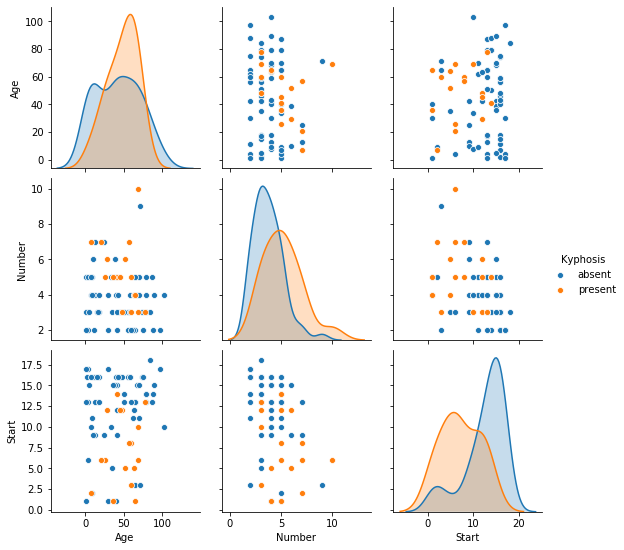

In [41]:
sns.pairplot(hue='Kyphosis',data=df)

# Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
pred=dtree.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.80      0.89      0.84        18
     present       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



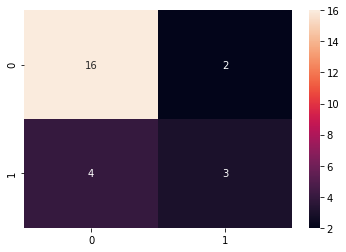

In [57]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)  # printing confusion matrix thorugh heatmap

# Random Forest

In [58]:
#to compare the accuaracy between decision tree and random forest , we will use random forest now

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rfc_pred = rfc.predict(X_test)

In [64]:
print(classification_report(y_test,rfc_pred)) #Accuracy for RandomForest is better

              precision    recall  f1-score   support

      absent       0.78      1.00      0.88        18
     present       1.00      0.29      0.44         7

    accuracy                           0.80        25
   macro avg       0.89      0.64      0.66        25
weighted avg       0.84      0.80      0.76        25



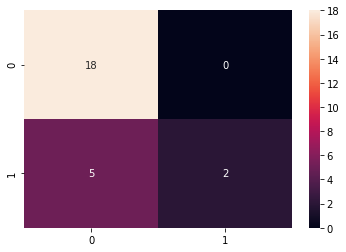

In [65]:
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True)  # printing confusion matrix thorugh heatmap